# Read data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from  visualize_sound import visualizeSoundv2, visualizeSoundv1
from pltSetup import pltSetup

In [2]:
PATH1 = "D:\\VoiceClone\\Resource\\vo_hutao_draw_appear.wav"
PATH2 = "D:\\VoiceClone\\Resource\\vo_hutao_friendship_01.wav"
PATH3 = "D:\\VoiceClone\\Resource\\vo_hutao_friendship_04.wav"
PATH4 = "D:\\VoiceClone\\Resource\\vo_yaeMiko_friendship_05.wav"
FIGSIZE = (15,5)

hi


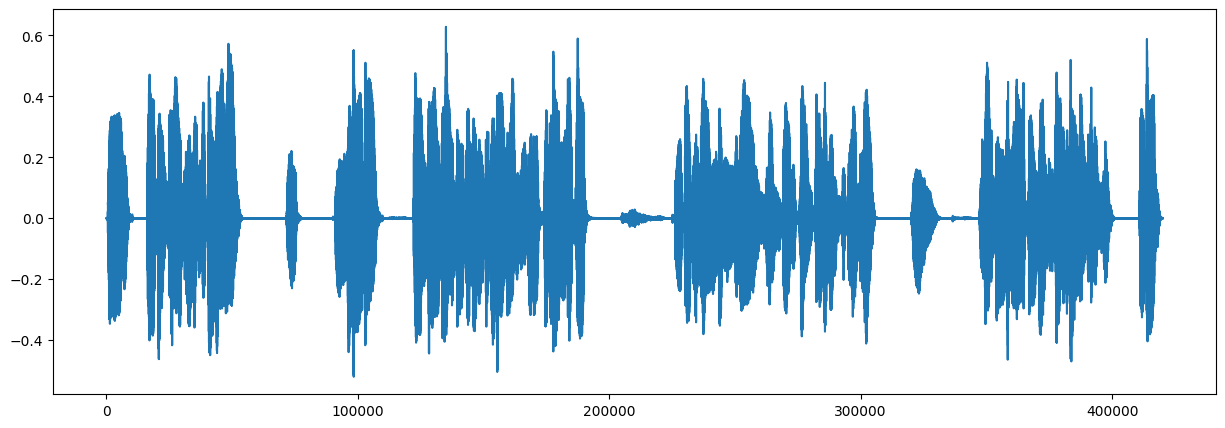

In [3]:
visualizeSoundv2(PATH1, FIGSIZE)

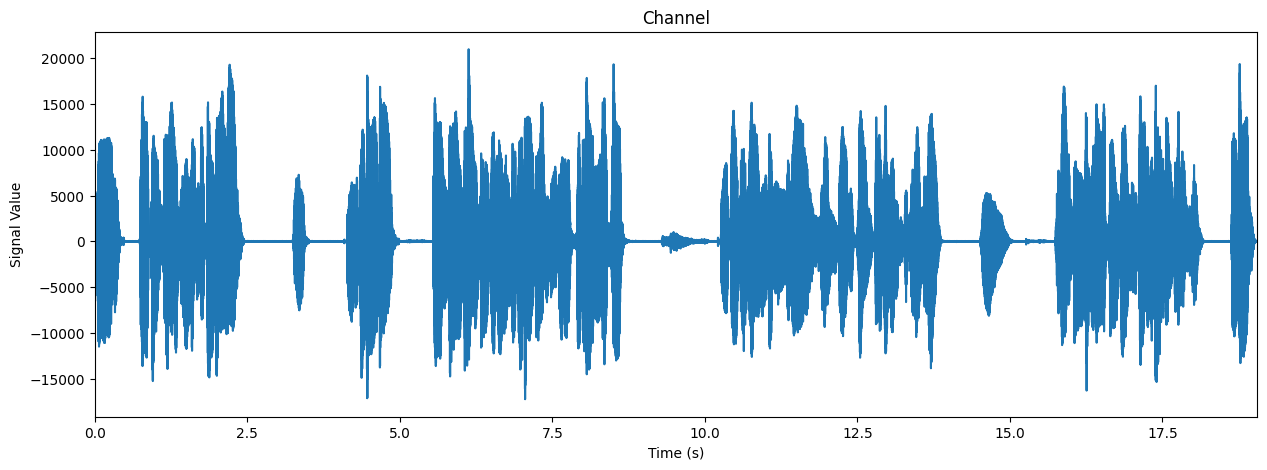

In [4]:
visualizeSoundv1(PATH1, FIGSIZE)

# Display short-term energy of the signal


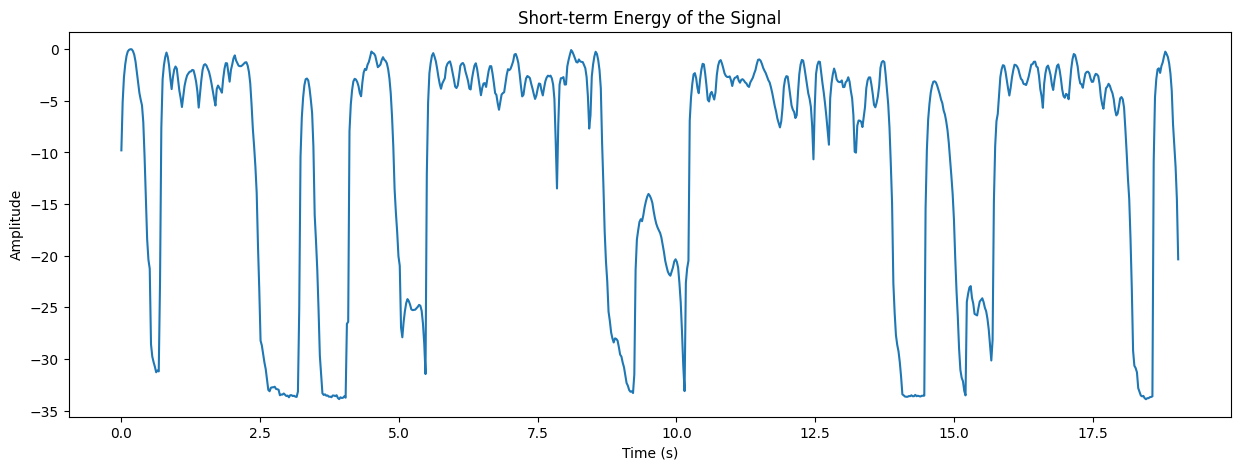

In [5]:
signal, sr = librosa.load(PATH1)
energy = librosa.feature.rms(y=signal, frame_length=2048, hop_length=512)

data = librosa.power_to_db(energy, ref=np.max)
time = librosa.frames_to_time(range(len(data[0])), sr=sr, hop_length=512)

# Bieu dien theo tin hieu nang luong voi don vi db
plt.figure(figsize=FIGSIZE)
plt.title('Short-term Energy of the Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(time, data[0])
plt.show()

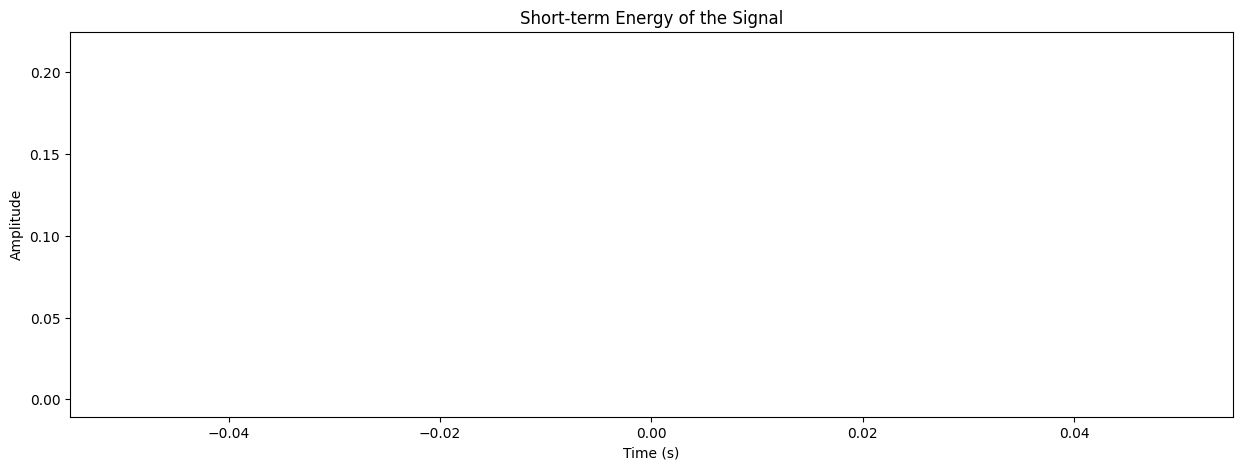

In [6]:
import librosa
time = librosa.frames_to_time(range(len(energy)), sr=sr)

plt.figure(figsize=FIGSIZE)
plt.plot(time, energy)
plt.title('Short-term Energy of the Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

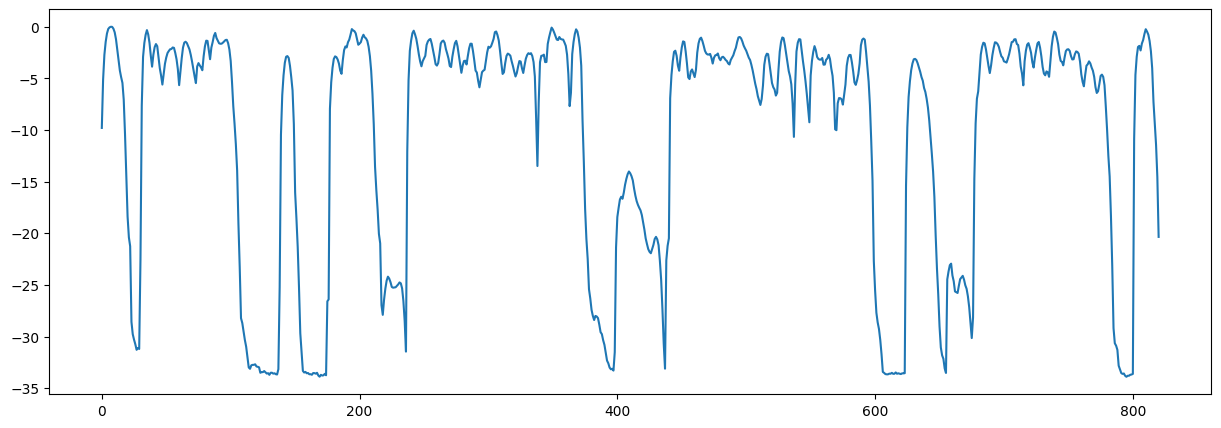

In [7]:
plt.figure(figsize=FIGSIZE)
plt.plot(data[0])
plt.show()

hi


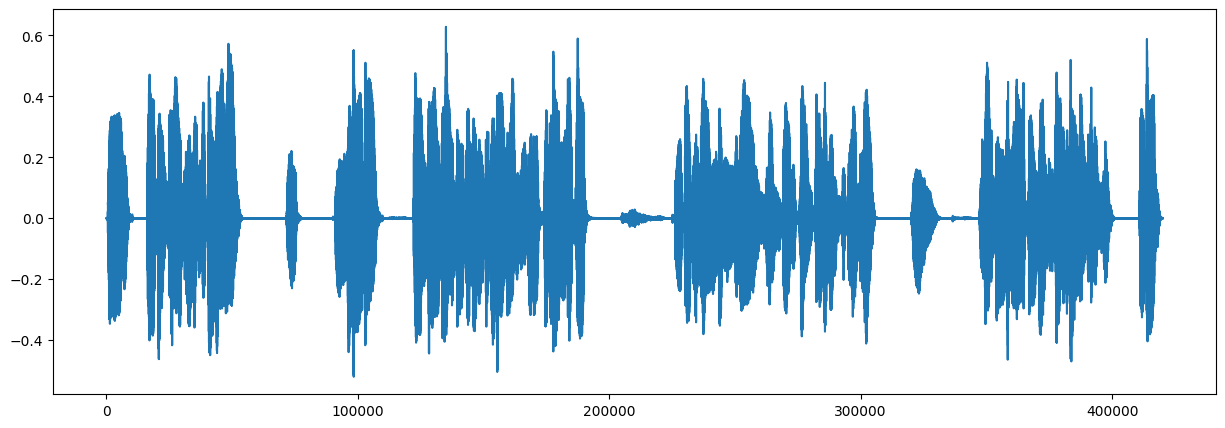

In [8]:
visualizeSoundv2(PATH1, FIGSIZE)

# More details of sound signals

2048
4.5351473922902495e-05


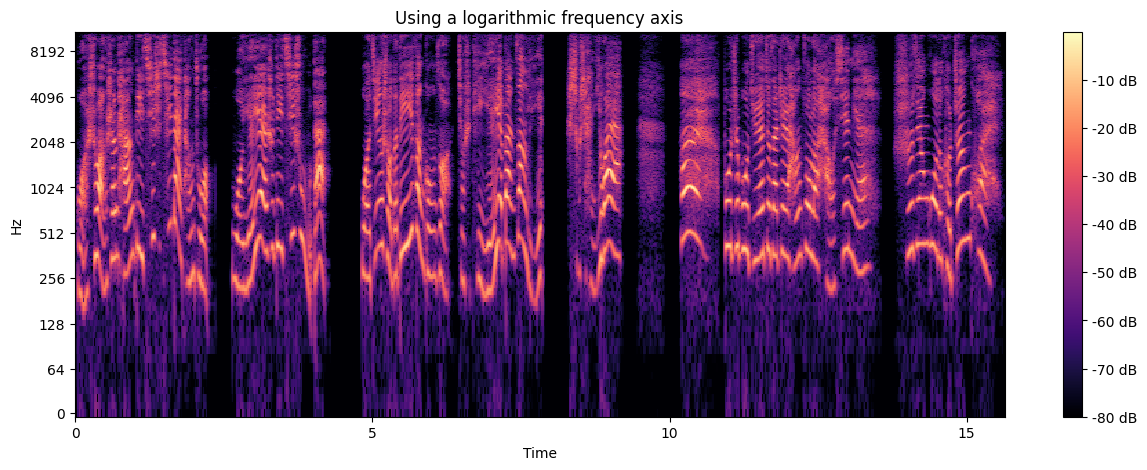

In [12]:
# display spectrogram
y, sr = librosa.load(PATH3)
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=FIGSIZE)  # Update the figsize parameter
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")


2048
4.5351473922902495e-05


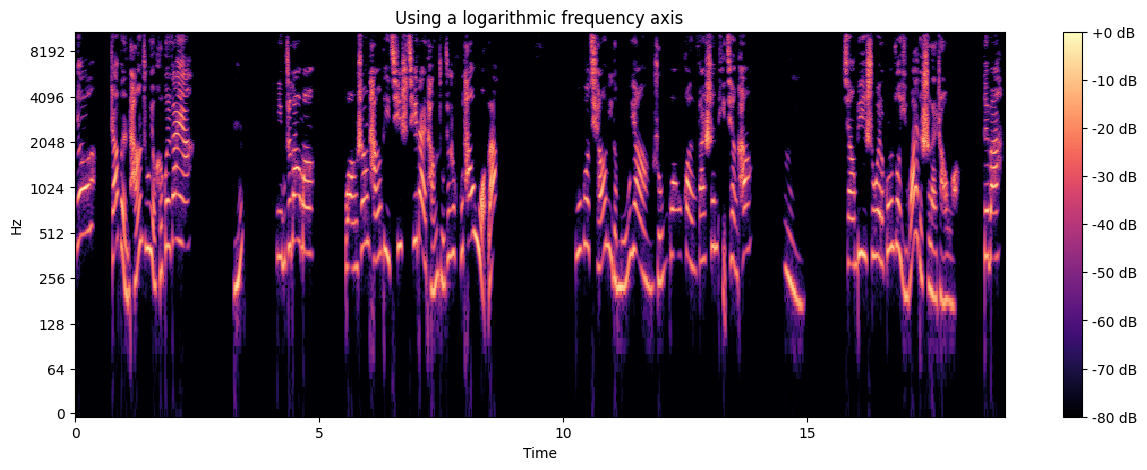

In [10]:
# Try display with denoise - omfg it so different
y, sr = librosa.load("D:\\VoiceClone\\mywav_reduced_noise.wav")
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=FIGSIZE)  # Update the figsize parameter
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")

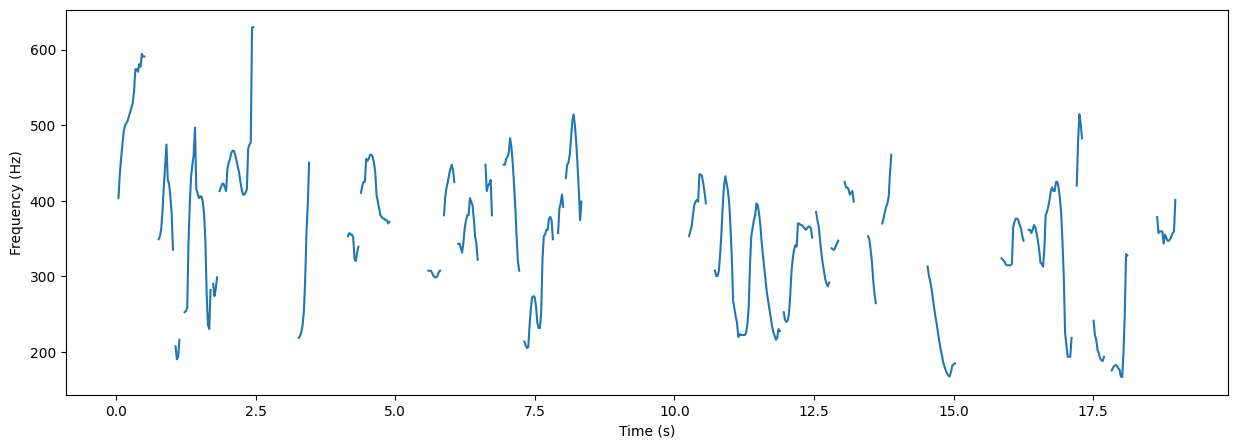

In [15]:
# return voice fundamental frequency
y, sr = librosa.load(PATH1)
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=800)

time = librosa.frames_to_time(range(len(f0)), sr=sr)

plt.figure(figsize=FIGSIZE)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.plot(time, f0)
plt.show()
